In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
import ssl
import random

In [2]:
df=pd.read_csv("FilmTV_dataset.csv")

In [3]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46907 entries, 0 to 46906
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filmtv_ID   46907 non-null  int64  
 1   film_title  46907 non-null  object 
 2   year        46907 non-null  int64  
 3   genre       46736 non-null  object 
 4   duration    46907 non-null  int64  
 5   country     46868 non-null  object 
 6   director    46904 non-null  object 
 7   actors      46778 non-null  object 
 8   avg_vote    46907 non-null  float64
 9   votes       46907 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.6+ MB


В столбце actors заполнены не все ячейки (строка 0). Также в данном столбце, данные не одинаковой длины. Но несмотря на это, они описаны максимально полно. Данные не полные, так как столбец actors не полностью заполнен.

In [5]:
df[~df['actors'].isnull()]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren",5.0,2
...,...,...,...,...,...,...,...,...,...,...
46902,162511,Clowntergeist,2017,Horror,80,United States,Aaron Mirtes,"Aaron Mirtes, Brittany Belland, Monica Baker, ...",6.0,1
46903,162533,Vampirella,1996,Action,82,United States,Jim Wynorski,"Talisa Soto, Roger Daltrey, Richard Joseph Pau...",5.0,1
46904,162711,Circus of the Dead,2017,Action,102,United States,Billy 'Bloody Bill' Pon,"Bill Oberst Jr., Parrish Randall, Chanel Ryan,...",8.0,1
46905,162713,Fear of Clowns,2004,Horror,106,United States,Kevin Kangas,"Rick Ganz, Jacqueline Reres, Mark Lassise, Car...",2.0,1


In [6]:
x = df['actors'].isnull().sum()
print('Количество записей, где столбец actors пустой:', x)

Количество записей, где столбец actors пустой: 129


## Мат.ожидание

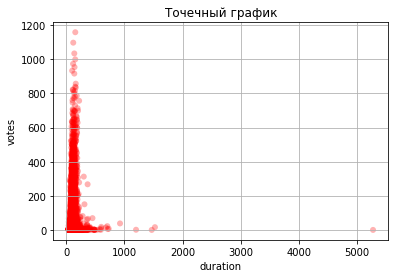

In [8]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Точечный график')
plt.show()

## Среднее значение

In [9]:
avg = sum(df['duration'])/len(df['duration'])
print('Среднее: ', round(avg, 3))

Среднее:  99.231


## Медиана

In [10]:
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


## Отклонение

In [11]:
so = statistics.pstdev(df['duration'])
print('Отклонение: ', round(so, 3))

Отклонение:  34.959


## Дисперсия

In [12]:
print('Дисперсия: ', round(so**2, 3))

Дисперсия:  1222.104


## Мода

In [13]:
print('Мода: ', statistics.mode(duration))

Мода:  90


Медиана не равна среднему значению. Мода меньше и медианы и среднего

## Минимум, максимум и размах

In [14]:
mind = min(duration)
maxd = max(duration)

print('Минимум: ', mind)
print('Максимум: ', maxd)
print('Размах: ', maxd-mind)

Минимум:  40
Максимум:  5280
Размах:  5240


## Выбросы

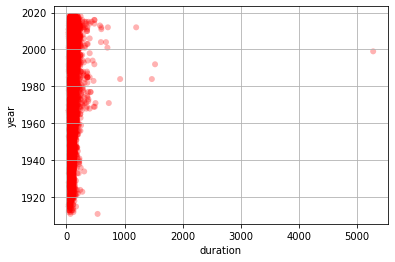

In [15]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

In [16]:
t = abs(maxd-avg)/so
print('Нормированное отклонение: ', t)

alfa = 0.05
t5 = 1.96
t01 = 3.3

n = df.size
print('Размер: ', n)

tau5=(t5*(n-1)**0.5)/((n-2)+t5*t5)
tau01=(t01*(n-1)**0.5)/((n-2)+t01*t01)
print('Пороги: tau 5% = ', tau5, ', tau 0.1% = ', tau01)

if t < tau5:
    print('Длительность 600 не аномальна')
if t > tau01:
    print('Длительность 600 аномальна')

Нормированное отклонение:  148.19724547272352
Размер:  469070
Пороги: tau 5% =  0.0028617722913964376 , tau 0.1% =  0.0048182176826148185
Длительность 600 аномальна


In [17]:
df.loc[df['duration'] > 600, :]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
23844,27983,Heimat - Eine Chronik in elf Teilen,1984,Drama,924,Germany,Edgar Reitz,"Marita Breuer, Gertrud Bredel, Michael Lesch, ...",9.0,39
23845,27984,Die Zweite Heimat - Chronik einer Jugend,1992,Drama,1525,Germany,Edgar Reitz,"Henry Arnold, Salome Kammer, Anke Sevenich, No...",9.2,17
23846,27985,Out 1: Noli me tangere,1971,Drama,729,France,Jacques Rivette,"Pierre Baillot, Juliet Berto, Marcel Bonozet, ...",7.8,8
24019,28193,Heimat 3 - Chronik einer Zeitenwende,2004,Drama,680,Germany,Edgar Reitz,"Henry Arnold, Salome Kammer, Michael Kausch He...",8.2,15
27462,35131,Gli ultimi giorni di Pompei,1984,Drama,1470,"Italy, Great Britain, United States",Peter R. Hunt,"Olivia Hussey, Ernest Borgnine, Lesley-Anne Do...",6.0,1
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1
39271,63245,The Untold History of the United States,2012,Documentary,713,United States,Oliver Stone,"Oliver Stone, Alan Shearman, Jim Ward, André S...",8.5,6
41240,72587,Äkta människor,2012,Drama,1200,Sweden,Lars Lundström,"Lisette Pagler, Pia Halvorsen, Johan Paulsen, ...",8.0,2
42871,80848,Band of Brothers,2001,War,705,"Great Britain, United States","Phil Alden Robinson, Richard Loncraine, Mikael...","Scott Grimes, Matthew Leitch, Damian Lewis, Ro...",8.4,23


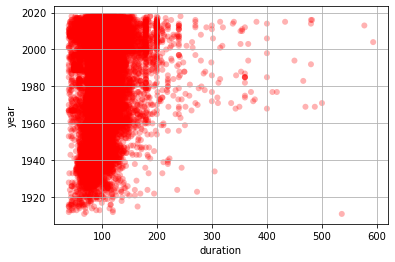

In [18]:
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

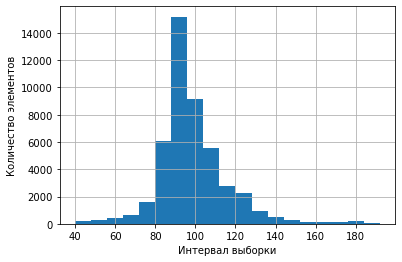

In [66]:
x = np.arange(40, 200, 8)

plt.hist(duration_new, x)
plt.xlabel('Интервал выборки')
plt.ylabel('Количество элементов')
plt.grid(True)

plt.show()

Распределение биномиальное

## Диаграмма рассеяния 

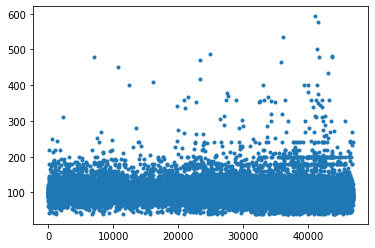

In [19]:
len_column = len(duration_new)
x = np.linspace(0, len_column, len_column)
plt.scatter(x, duration_new, marker='.')

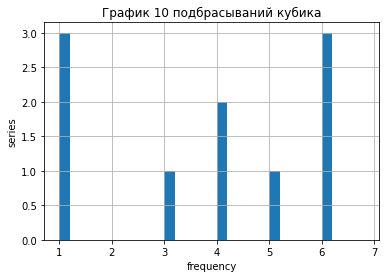

In [20]:
values = []
x = np.arange(1, 7, 0.2)

for i in range(10):
    values.append(random.randint(1, 6))
    
s = pd.Series(values)
plt.hist(s, x)
plt.xlabel('frequency')
plt.ylabel('series')
plt.title('График 10 подбрасываний кубика')
plt.grid(True)
plt.show()

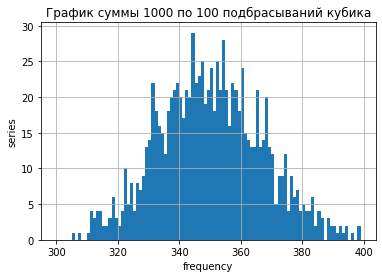

In [21]:
values = []
x = np.arange(300, 400, 1)

for i in range(1000):
    s = 0
    for i in range(100):
        s += random.randint(1, 6)
    values.append(s)

s = pd.Series(values)

plt.hist(s, x)
plt.xlabel('frequency')
plt.ylabel('series')
plt.title('График суммы 1000 по 100 подбрасываний кубика')
plt.grid(True)
plt.show()

Моделирование подтверждает центрально-предельную теорему - сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение близкое к нормальному